In [1]:
#Importando a biblioteca
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Fazendo o Upload do arquivo
from google.colab import files
arq = files.upload()

Saving Bibliotecas_do_IFSP_Acervo.csv to Bibliotecas_do_IFSP_Acervo.csv


In [3]:
#Criando o DataFrame desse arquivo
df = pd.read_csv("Bibliotecas_do_IFSP_Acervo.csv", encoding = "ISO-8859-1", engine='python', sep=";")

In [4]:
# Visualizando se a tabela foi exportada
df.head()

,Biblioteca (câmpus),Cód. Tipo Obra,Descrição Tipo Obra,Acervo - Total Obras,Acervo - Total de Exemplares,Aquisições - Total Obras,Aquisições - Total de Exemplares,Ano
0,Materiais on-line,1,Livros,7,0,0.0,0.0,2015
1,Materiais on-line,1,Livros,13,0,6.0,0.0,2016
2,Materiais on-line,1,Livros,7626,0,7616.0,0.0,2017
3,Materiais on-line,101,TFC (Trab.Final Curso Tecnico),23,0,22.0,0.0,2017
4,Materiais on-line,26,Referência,1,0,0.0,0.0,2015


In [5]:
# Renomeando os nomes de cada uma das colunas
df = df.rename(columns={"Biblioteca (câmpus)":"campus", "Cód. Tipo Obra": "cod_tipo_obra", "Descrição Tipo Obra":"descricao_obra", "Acervo - Total Obras":"acervo_total_obras", "Acervo - Total de Exemplares":"acervo_total_de_exemplares", "Aquisições - Total Obras":"aquisicoes_total_obras", "Aquisições - Total de Exemplares":"aquisicoes_total_de_exemplares", "Ano": "ano"})

In [6]:
#Total de linhas e colunas
df.shape

(636, 8)

In [7]:
#Analizando os tipos de dados dessa tabela 
df.dtypes

campus                             object
cod_tipo_obra                       int64
descricao_obra                     object
acervo_total_obras                  int64
acervo_total_de_exemplares          int64
aquisicoes_total_obras            float64
aquisicoes_total_de_exemplares    float64
ano                                 int64
dtype: object

In [8]:
#Verificando se a Tabela possui valores vazios 
df.isnull().sum()

campus                             0
cod_tipo_obra                      0
descricao_obra                     0
acervo_total_obras                 0
acervo_total_de_exemplares         0
aquisicoes_total_obras            94
aquisicoes_total_de_exemplares    94
ano                                0
dtype: int64

In [9]:
#Substituindo os valores nulos por 0
df["cod_tipo_obra"].fillna(0, inplace=True)
df["descricao_obra"].fillna(0, inplace=True)
df["acervo_total_obras"].fillna(0, inplace=True)
df["acervo_total_de_exemplares"].fillna(0, inplace=True)
df["aquisicoes_total_obras"].fillna(0, inplace=True)
df["aquisicoes_total_de_exemplares"].fillna(0, inplace=True)
df["ano"].fillna(0, inplace=True)



In [13]:
#Alterando o tipo de dado das colunas: acervo_total_obras, acervo_total_de_exemplares, aquisicoes_total_obras e aquisicoes_total_de_exemplares  para INT64
df["acervo_total_obras"] = df["acervo_total_obras"].astype("int64")
df["aquisicoes_total_obras"] = df["aquisicoes_total_obras"].astype("int64")
df["aquisicoes_total_de_exemplares"] = df["aquisicoes_total_de_exemplares"].astype("int64")
df["acervo_total_de_exemplares"] = df["acervo_total_de_exemplares"].astype("int64")
df["ano"] = df["ano"].astype("int64")

In [11]:
#Verificando se os tipos de dado de cada coluna foi alterado
df.dtypes

campus                            object
cod_tipo_obra                      int64
descricao_obra                    object
acervo_total_obras                 int64
acervo_total_de_exemplares         int64
aquisicoes_total_obras             int64
aquisicoes_total_de_exemplares     int64
ano                                int64
dtype: object

In [12]:
#Vendo os Câmpus que estão incluidos nessa Tabela
df["campus"].unique()

array([' Materiais on-line', 'Araraquara                              ',
       'Avaré                                   ',
       'Barretos                                ',
       'Birigui                                 ',
       'Boituva                                 ',
       'Bragança Paulista                       ',
       'Campinas                                ',
       'Campos do Jordão                        ',
       'Capivari                                ',
       'Caraguatatuba                           ',
       'Catanduva                               ',
       'Cubatão                                 ',
       'Guarulhos                               ',
       'Hortolândia                             ',
       'Ilha Solteira                           ',
       'Itapetininga                            ',
       'Jacarei                                 ',
       'Jundiaí                                 ',
       'Matão                                   ',
       'P

In [15]:
# Realizando um Agrupamento por Câmpus + Descrição da obra e a Quantidade 
df.groupby(['campus','descricao_obra'])['acervo_total_obras'].sum().reset_index()

,campus,descricao_obra,acervo_total_obras
0,Materiais on-line,Artigos,5
1,Materiais on-line,Dissertações,4
2,Materiais on-line,Livro eletrônico,417
3,Materiais on-line,Livros,7646
4,Materiais on-line,Referência,3
...,...,...,...
269,Votuporanga,Livros,6447
270,Votuporanga,Referência,28
271,Votuporanga,TCCP - Pós-Graduação,3
272,Votuporanga,TFC (Trab.Final Curso Tecnico),59


In [17]:
#Filtrando os câmpus que estão entre as letra [A-C]

filtro1 = df.campus.str[0] >= 'A'
filtro2 = df.campus.str[0] <= 'C'
filtro3 = filtro1 + filtro2
df.loc[filtro1 & filtro2]


/usr/local/lib/python3.7/dist-packages/pandas/core/computation/expressions.py:204: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "


,campus,cod_tipo_obra,descricao_obra,acervo_total_obras,acervo_total_de_exemplares,aquisicoes_total_obras,aquisicoes_total_de_exemplares,ano
20,Araraquara,1,Livros,899,4152,0,0,2015
21,Araraquara,1,Livros,1446,6704,638,2552,2016
22,Araraquara,1,Livros,1934,7538,518,865,2017
23,Araraquara,13,Literatura,1,1,1,1,2017
24,Araraquara,15,Periódicos,30,305,0,0,2015
...,...,...,...,...,...,...,...,...
243,Cubatão,5,Apostila,1,2,1,2,2016
244,Cubatão,5,Apostila,1,2,0,0,2017
245,Cubatão,6,Dissertações,1,1,1,1,2017
246,Cubatão,7,TCC - Graduação,273,273,273,273,2017


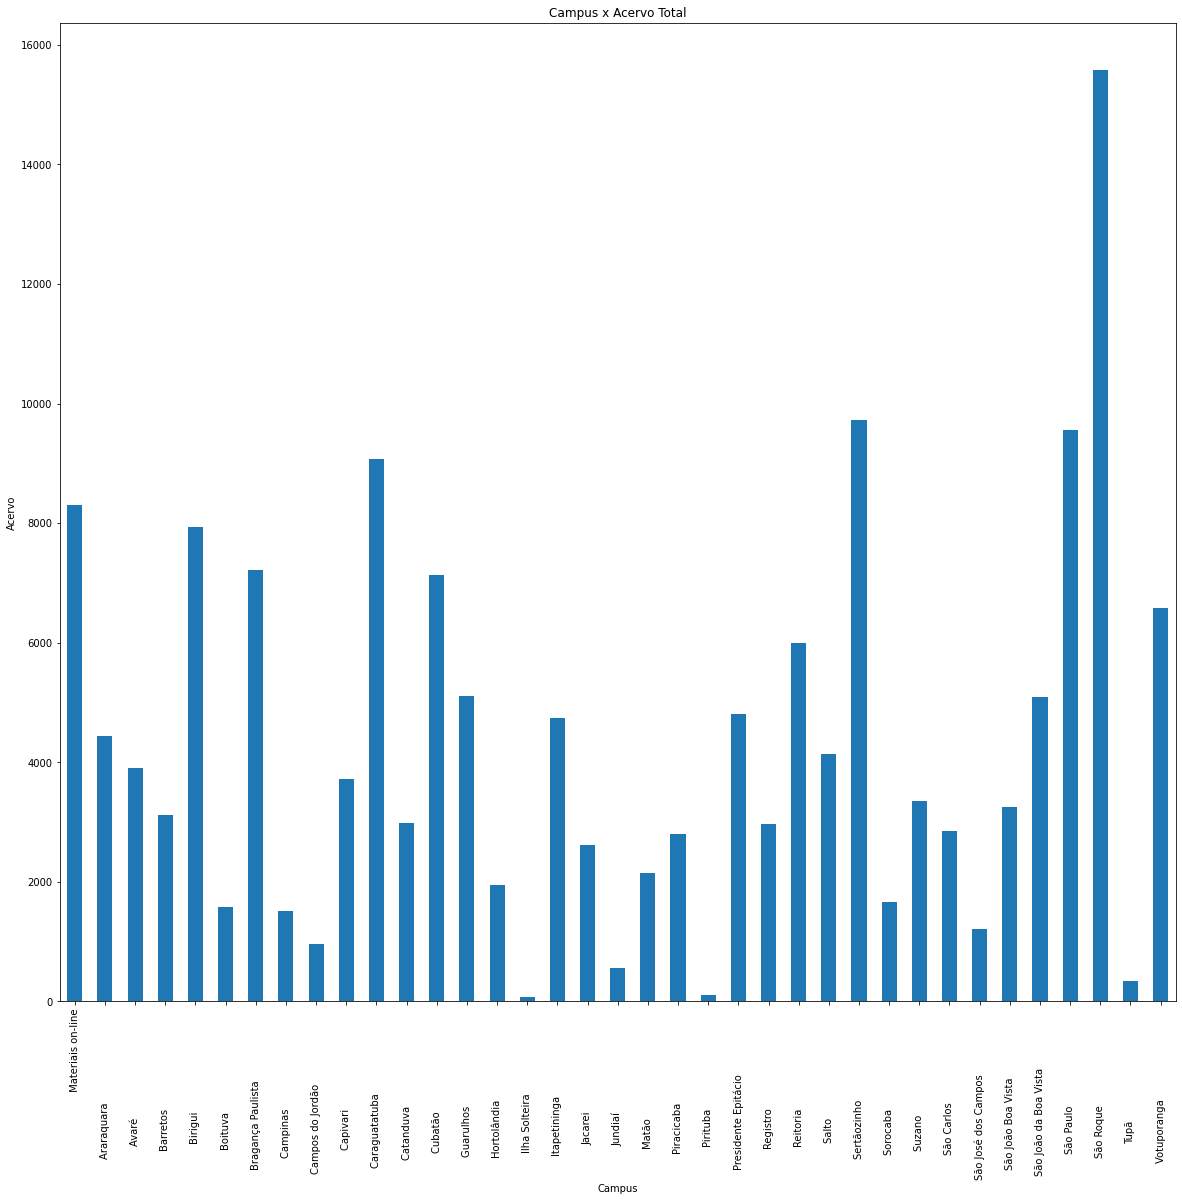

In [20]:
# Construindo um gráfico das relações entre cada câmpus e seu acervo total
df.groupby("campus")["acervo_total_obras"].sum().plot.bar(title="Campus x Acervo Total")
plt.xlabel("Campus")
plt.ylabel("Acervo")
plt.gcf().set_size_inches(20, 18)
